In [35]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/processed/fraudTrain_balanced.csv')
df.head()


,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0
2,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0
3,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0
4,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0


In [36]:
from sklearn.preprocessing import StandardScaler
import torch

# Separando features e target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Criando o normalizador
scaler = StandardScaler()

# Aplicando normalização nas features
X_scaled = scaler.fit_transform(X)

# Convertendo para tensores PyTorch
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Conferindo os shapes
print(f'Shape das features (X): {X_tensor.shape}')
print(f'Shape dos labels (y): {y_tensor.shape}')


Shape das features (X): torch.Size([2578338, 13])
Shape dos labels (y): torch.Size([2578338, 1])


In [37]:
import torch.nn as nn

class NeuralNetV2(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetV2, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [38]:
model = NeuralNetV2(input_size=X_tensor.shape[1])

criterion = nn.BCELoss()  # Ou usar BCEWithLogitsLoss e remover Sigmoid da saída
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-5)


In [39]:
# Verificar se CUDA está disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")



Usando dispositivo: cpu


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

# Separando features e target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Conversão para tensores
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Dataset e DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)


In [41]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Modelo
model = NeuralNetV2(input_size=X_tensor.shape[1])

# Loss e otimizador
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-5)

# Treinamento
epochs = 35

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs).view(-1)
        labels = labels.view(-1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f}')


Epoch 1/35 | Loss: 0.3065
Epoch 2/35 | Loss: 0.2632
Epoch 3/35 | Loss: 0.2503
Epoch 4/35 | Loss: 0.2433
Epoch 5/35 | Loss: 0.2370
Epoch 6/35 | Loss: 0.2323
Epoch 7/35 | Loss: 0.2291
Epoch 8/35 | Loss: 0.2274
Epoch 9/35 | Loss: 0.2256
Epoch 10/35 | Loss: 0.2239
Epoch 11/35 | Loss: 0.2223
Epoch 12/35 | Loss: 0.2203
Epoch 13/35 | Loss: 0.2193
Epoch 14/35 | Loss: 0.2176
Epoch 15/35 | Loss: 0.2171
Epoch 16/35 | Loss: 0.2161
Epoch 17/35 | Loss: 0.2155
Epoch 18/35 | Loss: 0.2153
Epoch 19/35 | Loss: 0.2147
Epoch 20/35 | Loss: 0.2142
Epoch 21/35 | Loss: 0.2134
Epoch 22/35 | Loss: 0.2137
Epoch 23/35 | Loss: 0.2128
Epoch 24/35 | Loss: 0.2126
Epoch 25/35 | Loss: 0.2128
Epoch 26/35 | Loss: 0.2122
Epoch 27/35 | Loss: 0.2122
Epoch 28/35 | Loss: 0.2112
Epoch 29/35 | Loss: 0.2115
Epoch 30/35 | Loss: 0.2114
Epoch 31/35 | Loss: 0.2109
Epoch 32/35 | Loss: 0.2107
Epoch 33/35 | Loss: 0.2104
Epoch 34/35 | Loss: 0.2102
Epoch 35/35 | Loss: 0.2102


Acurácia: 0.9085
Precisão: 0.9300
Recall: 0.8835
F1-Score: 0.9062

Relatório de Classificação:

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91    257834
         1.0       0.93      0.88      0.91    257834

    accuracy                           0.91    515668
   macro avg       0.91      0.91      0.91    515668
weighted avg       0.91      0.91      0.91    515668



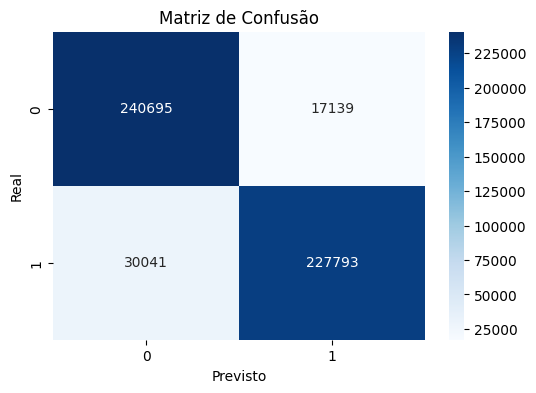

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Avaliação
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor).view(-1)
    y_pred = (y_pred_probs >= 0.5).int()

# Convertendo para numpy
y_true = y_test_tensor.view(-1).numpy()
y_pred_np = y_pred.numpy()

# Métricas
acc = accuracy_score(y_true, y_pred_np)
prec = precision_score(y_true, y_pred_np)
rec = recall_score(y_true, y_pred_np)
f1 = f1_score(y_true, y_pred_np)

print(f'Acurácia: {acc:.4f}') 
print(f'Precisão: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1-Score: {f1:.4f}')

# Relatório detalhado
print('\nRelatório de Classificação:\n')
print(classification_report(y_true, y_pred_np))

# Matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_np)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()
